# CS 6220 Data Mining — Assignment 8

# Decision Tree

In [1]:
import pandas as pd

# Load the dataset from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
column_names = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

# Read the data into a DataFrame
df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the DataFrame
print(df.head())


   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


# 1. Split the dataset into 60% training set and 40% test set.

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
y = df['Class']

# Split the dataset: 60% training and 40% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Display the size of the training and test sets
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (823, 4)
Test set size: (549, 4)


# 2. Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predictions for your data.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Accuracy on the test set: 0.9781420765027322


# 3. Report the tree depth, number of leaves, feature importance, train score, and test score of the tree.

In [10]:
# Report tree depth and number of leaves
tree_depth = clf.get_depth()
num_leaves = clf.get_n_leaves()

# Get feature importances
feature_importances = clf.feature_importances_

# Calculate train score
train_score = clf.score(X_train, y_train)

# Print results
print("Tree Depth:", tree_depth)
print("Number of Leaves:", num_leaves)
print("Feature Importances:", feature_importances)
print("Train Score:", train_score)
print("Test Score:", accuracy)  # Already calculated previously


Tree Depth: 7
Number of Leaves: 27
Feature Importances: [0.60767458 0.23853366 0.1344064  0.01938536]
Train Score: 1.0
Test Score: 0.9781420765027322


# 4. Now you will generate decision trees on the same training set using fixed tree depths. The tree depth can be set using max=d, where d is the depth of the tree.

In [13]:
from sklearn.metrics import accuracy_score

# List of depths to train the decision trees
depths = [3, 5, 7, 9]

for d in depths:
    # Train the decision tree with the specified max depth
    clf = DecisionTreeClassifier(criterion='gini', max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = clf.score(X_train, y_train)
    
    # Print the results for each depth
    print(f"Depth {d}:")
    print("  Train Accuracy:", train_accuracy)
    print("  Test Accuracy:", test_accuracy)
    print("  Number of Leaves:", clf.get_n_leaves())
    print("  Feature Importances:", clf.feature_importances_)
    print()


Depth 3:
  Train Accuracy: 0.9428918590522479
  Test Accuracy: 0.9253187613843351
  Number of Leaves: 8
  Feature Importances: [0.75047338 0.1792987  0.07022793 0.        ]

Depth 5:
  Train Accuracy: 0.982989064398542
  Test Accuracy: 0.9690346083788707
  Number of Leaves: 19
  Feature Importances: [0.62259117 0.24481672 0.12049491 0.0120972 ]

Depth 7:
  Train Accuracy: 1.0
  Test Accuracy: 0.9781420765027322
  Number of Leaves: 27
  Feature Importances: [0.60767458 0.23853366 0.1344064  0.01938536]

Depth 9:
  Train Accuracy: 1.0
  Test Accuracy: 0.9781420765027322
  Number of Leaves: 27
  Feature Importances: [0.60767458 0.23853366 0.1344064  0.01938536]



# 5. Decrease depth from the decision tree in Step 2, and for every depth (from max depth to depth 1), report tree depth, number of leaves, feature importance, train score, and test score of the tree.

In [16]:
# Get the original maximum depth from the decision tree in Step 2
original_max_depth = clf.get_depth()

# Loop from the original maximum depth down to 1
for d in range(original_max_depth, 0, -1):
    # Train the decision tree with the specified max depth
    clf = DecisionTreeClassifier(criterion='gini', max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = clf.score(X_train, y_train)
    
    # Print the results for each depth
    print(f"Depth {d}:")
    print("  Train Accuracy:", train_accuracy)
    print("  Test Accuracy:", test_accuracy)
    print("  Tree Depth:", clf.get_depth())
    print("  Number of Leaves:", clf.get_n_leaves())
    print("  Feature Importances:", clf.feature_importances_)
    print()


Depth 7:
  Train Accuracy: 1.0
  Test Accuracy: 0.9781420765027322
  Tree Depth: 7
  Number of Leaves: 27
  Feature Importances: [0.60767458 0.23853366 0.1344064  0.01938536]

Depth 6:
  Train Accuracy: 0.9963547995139733
  Test Accuracy: 0.9799635701275046
  Tree Depth: 6
  Number of Leaves: 24
  Feature Importances: [0.60986751 0.23553871 0.14295504 0.01163874]

Depth 5:
  Train Accuracy: 0.982989064398542
  Test Accuracy: 0.9690346083788707
  Tree Depth: 5
  Number of Leaves: 19
  Feature Importances: [0.62259117 0.24481672 0.12049491 0.0120972 ]

Depth 4:
  Train Accuracy: 0.9623329283110571
  Test Accuracy: 0.9544626593806922
  Tree Depth: 4
  Number of Leaves: 12
  Feature Importances: [0.70041677 0.16728266 0.13230057 0.        ]

Depth 3:
  Train Accuracy: 0.9428918590522479
  Test Accuracy: 0.9253187613843351
  Tree Depth: 3
  Number of Leaves: 8
  Feature Importances: [0.75047338 0.1792987  0.07022793 0.        ]

Depth 2:
  Train Accuracy: 0.9246658566221142
  Test Accuracy:

# 6. Show the visual output of the decision tree from Step-2.

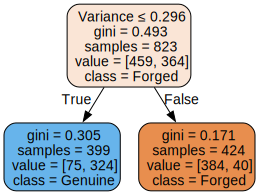

In [19]:
from sklearn import tree
import graphviz

# Visualize the decision tree
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'],
    class_names=['Forged', 'Genuine'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Generate and display the graph in the notebook
graph = graphviz.Source(dot_data)
graph  # Display the graph directly in the notebook


# 7. Show the visual output of the decision tree with highest test score from Step-5.

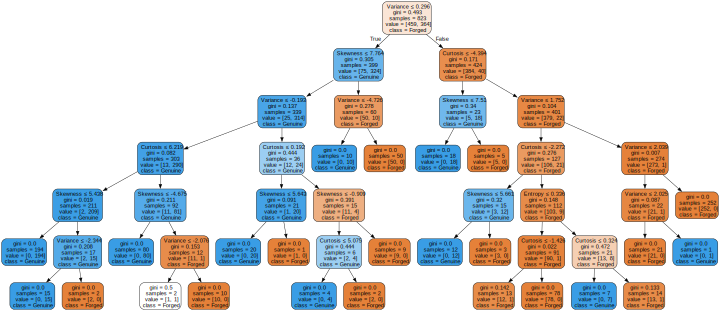

In [29]:
from sklearn import tree
import graphviz

# Visualize the decision tree with reduced size
dot_data = tree.export_graphviz(
    best_clf,
    out_file=None,
    feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'],
    class_names=['Forged', 'Genuine'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Add a size attribute directly in the dot_data string
dot_data = 'digraph Tree {\nsize="10,8";\n' + dot_data.split('digraph Tree {', 1)[1]

# Generate and display the graph with the new size
graph = graphviz.Source(dot_data, format="png")
graph  # Display the graph directly in the notebook


Original Decision Tree (Step 2):
Tree Depth: 1
Number of Leaves: 2
Feature Importances: [1. 0. 0. 0.]
Train Score: 0.8602673147023087
Test Score: 0.8415300546448088

Decision Tree with Depth 1:
  Tree Depth: 1
  Feature Importances: [1. 0. 0. 0.]
  Train Score: 0.8602673147023087
  Test Score: 0.8415300546448088


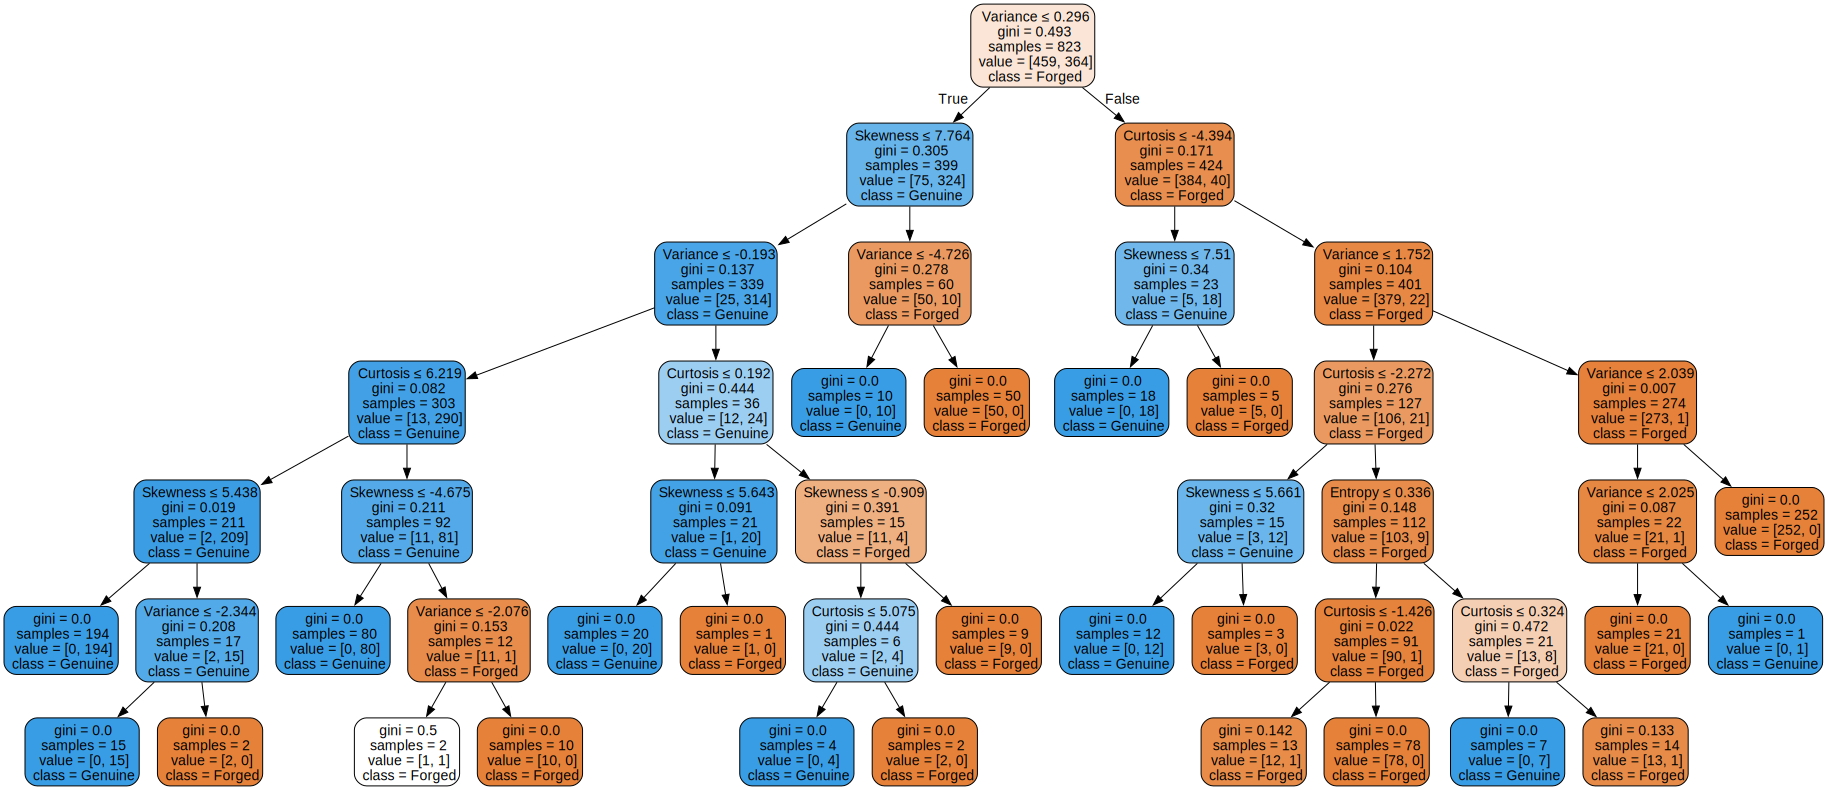

In [31]:
# Report for the original tree (Step 2)
print("Original Decision Tree (Step 2):")
print(f"Tree Depth: {clf.get_depth()}")
print(f"Number of Leaves: {clf.get_n_leaves()}")
print(f"Feature Importances: {clf.feature_importances_}")
print(f"Train Score: {clf.score(X_train, y_train)}")
print(f"Test Score: {accuracy_score(y_test, clf.predict(X_test))}")

# Report for trees with different depths (Step 5)
depths = range(clf.get_depth(), 0, -1)
for d in depths:
    temp_clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    temp_clf.fit(X_train, y_train)
    train_acc = temp_clf.score(X_train, y_train)
    test_acc = accuracy_score(y_test, temp_clf.predict(X_test))
    
    print(f"\nDecision Tree with Depth {d}:")
    print(f"  Tree Depth: {temp_clf.get_depth()}")
    print(f"  Feature Importances: {temp_clf.feature_importances_}")
    print(f"  Train Score: {train_acc}")
    print(f"  Test Score: {test_acc}")

# Visualize the two decision trees (from Step 2 and highest test score from Step 5)
# Step 2 Tree
dot_data_2 = tree.export_graphviz(
    clf, out_file=None, feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'],
    class_names=['Forged', 'Genuine'], filled=True, rounded=True, special_characters=True
)
graph_2 = graphviz.Source(dot_data_2)
graph_2.render("original_decision_tree")  # Save if needed
graph_2  # Display in notebook

# Best tree from Step 5 (e.g., depth 6)
best_depth = 6  # Replace with the actual best depth if different
best_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_clf.fit(X_train, y_train)
dot_data_best = tree.export_graphviz(
    best_clf, out_file=None, feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'],
    class_names=['Forged', 'Genuine'], filled=True, rounded=True, special_characters=True
)
graph_best = graphviz.Source(dot_data_best)
graph_best.render("best_decision_tree")  # Save if needed
graph_best  # Display in notebook
